In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
PATH= '/content/drive/My Drive/2020-2_ImageProcessing/image'

#Histogram Equalization of Grayscale
흑백이미지를 이용하여 Histogram Equalization을 수행

hist:(256,),bins:(257,),cdf:(256,)
cdf_m:(256,)


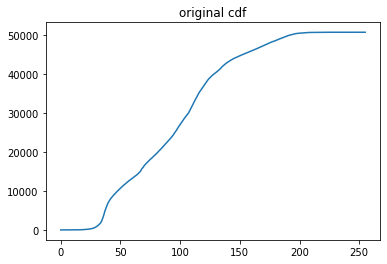

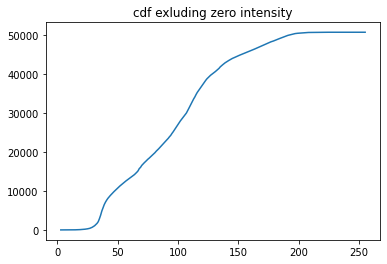

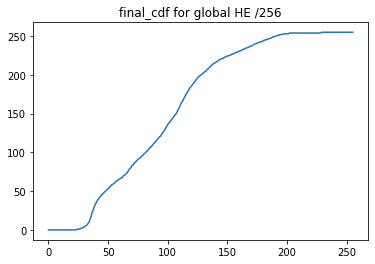

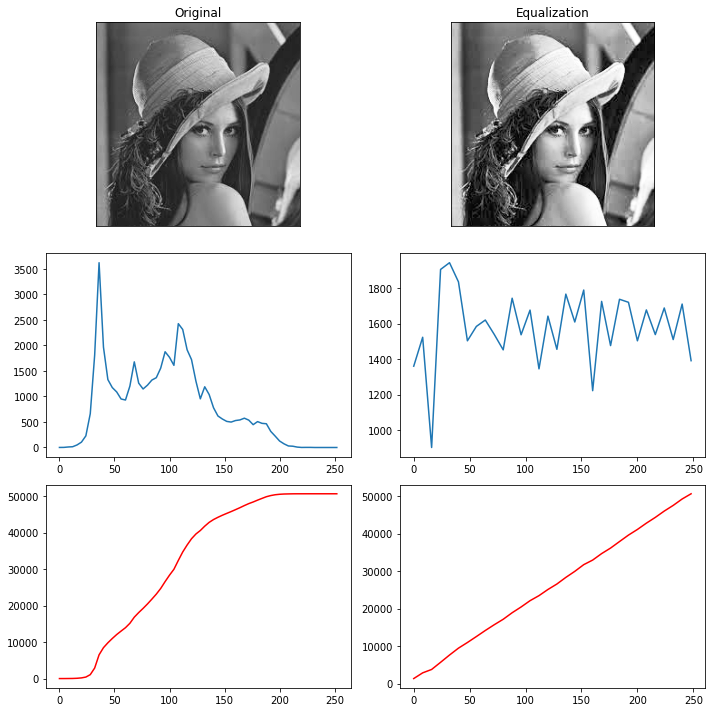

In [46]:
#-*-coding:utf-8-*-
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

#다음 작업(histogram equalization of color image)과 비교,통일을 위해 color image인 'lena.jpg'를 불러옴
img = cv2.imread(os.path.join(PATH, 'lena.jpg'))
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# numpy를 이용한 histogramming
hist, bin_edges = np.histogram(img.flatten(), 256,range=[0,256])
# cumulative histogram
cdf = hist.cumsum()
print(f'hist:{hist.shape},bins:{bin_edges.shape},cdf:{cdf.shape}')
plt.figure()
plt.title('original cdf')
plt.plot(cdf)


# -----------------------------------------------------
# Histogram Equalization
#
# cdf의 값이 0인 경우는 mask처리를 하여 계산에서 제외
# mask처리가 되면 Numpy 계산에서 제외가 됨
# 아래는 cdf array에서 값이 0인 부분을 mask처리함
cdf_m = np.ma.masked_equal(cdf,0)
print(f'cdf_m:{cdf_m.shape}')
plt.figure()
plt.title('cdf exluding zero intensity')
plt.plot(cdf_m)

#History Equalization 공식
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())


# Mask처리를 했던 부분을 다시 0으로 변환
cdf = np.ma.filled(cdf_m,0).astype('uint8')
plt.figure()
plt.title('final_cdf for global HE /'+str(len(cdf)))
plt.plot(cdf)


img_he = cdf[img]

#처리한 이미지를 plot으로 display
plt.figure(figsize=(10,10))
#plt.style.use('dark_background')
plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.subplot(321),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]),plt.yticks([])
plt.subplot(322),plt.imshow(img_he,cmap='gray'),plt.title('Equalization')
plt.xticks([]),plt.yticks([])

#original image에 대한 정보를 담은 그래프들을 display  
bin_size = 4
hist, bins = np.histogram(img.flatten(),int(256/bin_size),[0,256])
cdf = hist.cumsum()
plt.subplot(323),plt.plot([bin_size*i for i in range(len(cdf))],hist)
plt.subplot(325),plt.plot([bin_size*i for i in range(len(cdf))],cdf, color='r')

#equalization된 image에 대한 정보를 담은 그래프들을 display 
bin_size = 8
hist, bins = np.histogram(img_he.flatten(),int(256/bin_size),[0,256])
cdf = hist.cumsum()
plt.subplot(324),plt.plot([bin_size*i for i in range(len(cdf))],hist)
plt.subplot(326),plt.plot([bin_size*i for i in range(len(cdf))],cdf, color='r')

plt.tight_layout()
plt.show()

#Histogram Equalization of Color Image
color image를 HSV나 YCrCb로 변환 후 Histogram Equalization을 수행한 다음 다시 color image로 변환시키는 과정을 거치면 color image도 histogram equalization을 수행할 수 있다.

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

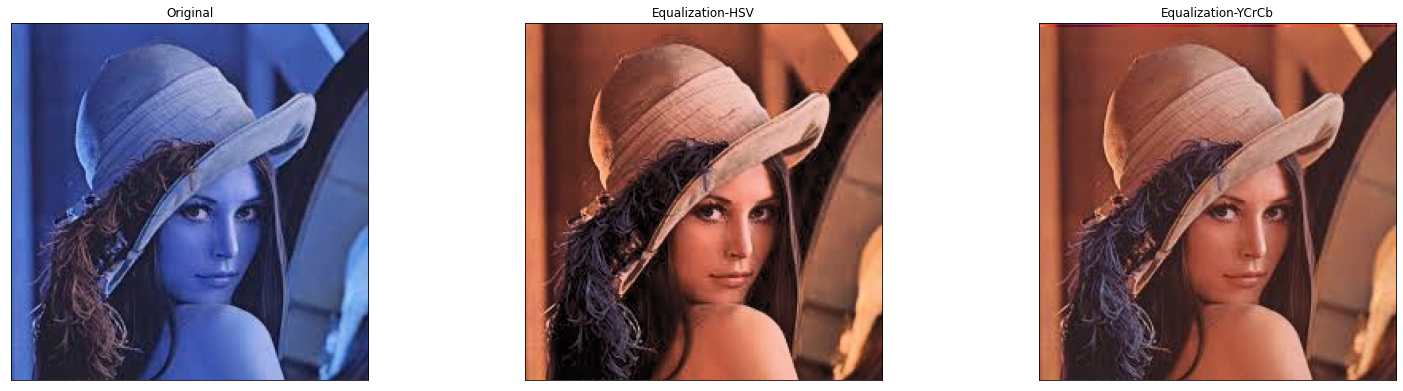

In [48]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

#color image 불러오기
img = cv2.imread(os.path.join(PATH, 'lena.jpg'))

# HSV형태를 통한 Histogram Equalization
# RGB이미지를 HSV로 변환
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# H,S,V 중 V채널에서 V값을 Histogram equalisation함.
img_hsv[:, :, 2] = cv2.equalizeHist(img_hsv[:, :, 2])

# HSV 형태를 BGR(RGB) 형태로 다시 변환
img_he_HSV = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

# YCrCb형태를 통한 Histogram Equalization
# # RGB이미지를 YCrCb로 변환
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

# Y, Cr, Cb 중 Y채널에서 Y값을 Histogram equalisation함.
img_YCrCb[2, :, :] = cv2.equalizeHist(img_YCrCb[2, :, :])

# HSV 형태를 BGR(RGB) 형태로 다시 변환
img_he_YCrCb = cv2.cvtColor(img_YCrCb, cv2.COLOR_YCrCb2BGR)


#equalization의 처리 전후 비교를 위해 이미지 3개를 pylot으로 display
plt.figure(figsize=(25,25))
#plt.style.use('dark_background')
plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.subplot(331),plt.imshow(img,cmap='brg'),plt.title('Original')
plt.xticks([]),plt.yticks([])
plt.subplot(332),plt.imshow(img_he_HSV,cmap='brg'),plt.title('Equalization-HSV')
plt.xticks([]),plt.yticks([])
plt.subplot(333),plt.imshow(img_he_YCrCb,cmap='brg'),plt.title('Equalization-YCrCb')
plt.xticks([]),plt.yticks([])